# House predictions with linear regression

In [13]:
import turicreate as tc
import numpy as np
import matplotlib.pyplot as plt
import utils

In [14]:
data = tc.SFrame('Hyderabad.csv')
data

Finished parsing file /Users/luisserrano/Documents/Book/code/manning/Chapter 3 - Linear Regression/Hyderabad.csv

Parsing completed. Parsed 100 lines in 0.056027 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,str,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/luisserrano/Documents/Book/code/manning/Chapter 3 - Linear Regression/Hyderabad.csv

Parsing completed. Parsed 2518 lines in 0.020351 secs.

Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens
6968000,1340,Nizampet,2,0,0,1,1,1
29000000,3498,Hitech City,4,0,0,1,1,1
6590000,1318,Manikonda,2,0,0,1,0,0
5739000,1295,Alwal,3,1,0,0,0,0
5679000,1145,Kukatpally,2,0,0,0,0,1
6099000,1230,Nizampet,2,0,0,0,0,0
7000000,1350,Manikonda,2,0,0,0,0,0
4198000,1400,Gachibowli,3,0,0,1,1,0
9900000,2240,Tellapur,3,0,0,1,1,0
9800000,1520,Gachibowli,2,1,0,0,0,0


### Exploring the relationship between price and area

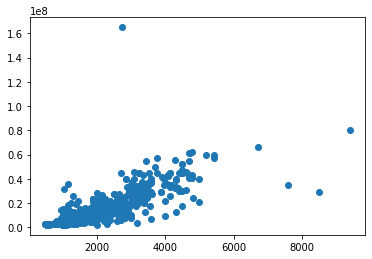

In [15]:
plt.scatter(data['Area'], data['Price'])

In [16]:
simple_model = tc.linear_regression.create(data, features=['Area'], target='Price')

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 2392

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.003931     | 144454572.088597   | 15277985.003418      | 4972770.889067                  | 3331559.315399                    |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

In [17]:
simple_model.coefficients

name,index,value,stderr
(intercept),None,-6142578.000532893,246334.477353732
Area,None,9704.72942252219,136.36994054983197


In [18]:
b, m = simple_model.coefficients['value']
print("slope:", m)
print("y-intercept:", b)

slope: 9704.72942252219
y-intercept: -6142578.000532893


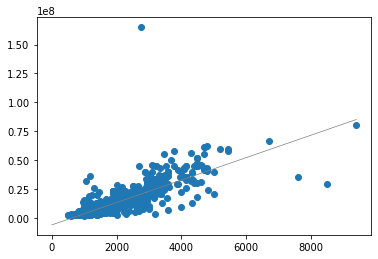

In [19]:
plt.scatter(data['Area'], data['Price'])
utils.draw_line(m, b, starting=0, ending=max(data['Area']))

### Building a model that uses all the features

In [20]:
model = tc.linear_regression.create(data, target='Price')

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 2392

Number of features          : 39

Number of unpacked features : 39

Number of coefficients    : 277

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.030911     | 140351121.523964   | 15868517.977856      | 4281011.681825                  | 2764127.471508                    |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

In [21]:
model.coefficients

name,index,value,stderr
(intercept),None,-2952247.5712972553,609936.129245844
Area,None,9066.799459088541,258.97795267488067
Location,Hitech City,4997916.846992685,777810.2035634923
Location,Manikonda,11775.133136453445,668824.6480154935
Location,Alwal,-676445.9023479818,1223527.4788180154
Location,Gachibowli,4634648.314461059,752930.5679570116
Location,Tellapur,-991360.1129945548,1060369.3202242504
Location,Kokapet,531562.539111399,807092.7988395646
Location,Hyder Nagar,1702803.016624335,2089161.989681937
Location,Mehdipatnam,108380.22487745673,1520908.5327287214


In [22]:
model.evaluate(data)

{'max_error': 140351121.52396426, 'rmse': 4218092.411530379}

In [23]:
house = tc.SFrame({'Area': [1000], 'No. of Bedrooms':[3]})
house

Area,No. of Bedrooms
1000,3


In [24]:
model.predict(house)

dtype: float
Rows: 1
[2075920.8465305176]